In [7]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# In SVR instead of a line we have a tube. This tube has a width of epislon. And this tube is called the epsilon-insensitive tube. The points that fall inside the tube will be diregarding the error.  

In [9]:
data = pd.read_csv('Position_Salaries.csv')
X = data.iloc[:,1:-1].values 
y = data.iloc[:,-1].values

In [10]:
y = y.reshape(len(y), 1)

In [11]:
from sklearn.preprocessing import StandardScaler 
sc_X = StandardScaler()
sc_Y = StandardScaler()
X = sc_X.fit_transform(X)
# we need to give a 2D array as the standardScaler takes a 2D array as input 
y = sc_Y.fit_transform(y)

In [12]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X, y)

C:\Users\aasth\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [13]:
# Since we scaled not only X but y also so to get back the original value we need to apply inverse_transform
sc_Y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

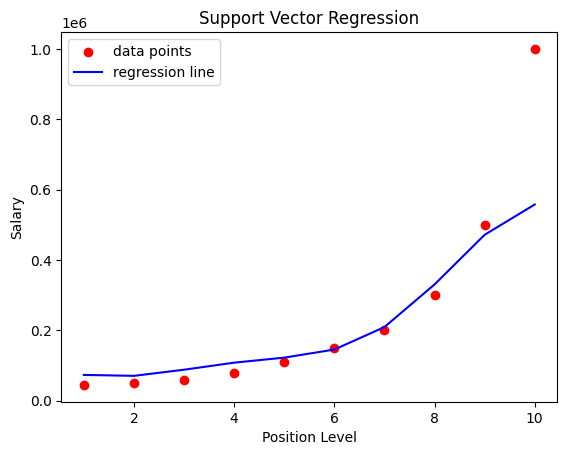

In [16]:
plt.scatter(sc_X.inverse_transform(X), sc_Y.inverse_transform(y), color = 'red', label = 'data points')
plt.plot(sc_X.inverse_transform(X), sc_Y.inverse_transform(regressor.predict(X).reshape(-1,1)), color = 'blue', label = 'regression line')
plt.title('Support Vector Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend()
plt.show()